# Trabajo de programación Nº 4

##Instrucciones Generales:

*   Siga las instrucciones del notebook
*   Cambie el Nombre del Archivo, indicando el Nº del trabajo y el número del grupo (para trabajos grupales) o su nombre (para trabajos individuales)
*   Use las celdas de texto, para explicar los objetivos del código y comentar los resultados obtenidos.
*   Use comentarios dentro del código para explicar cómo funciona, por qué usa tal o cual comando, que contienen las variables, etc.
*   Edite la celda siguiente, para completar el nombre, rut y correo del (de los) integrante(s).








## Identificación del (de los) Estudiante(s):
<table>
<tr>
<th> Nombre </th>
<th> RUT </th>
<th> email </th>
</tr>
<tr>
<td> Fabian Trigo </td>
<td> 20.183.107-5 </td>
<td> fabian.trigo@alumnos.uv.cl </td>
</tr>
<tr>
<td> nombre </td>
<td> rut </td>
<td> email </td>
</tr>
<tr>
<td> nombre </td>
<td> rut </td>
<td> email </td>
</tr>
</table>

## Instrucciones específicas
En este trabajo intentaremos estimar el caudal de 3 ríos chilenos en puntos específicos. Los datos fueron tomados del proyecto FONDEF HidroCL y aún mantienen el carácter de reservados, por lo que se prohibe su publicación fuera del ámbito de este curso.

Los datos se encuentran el archivo df_rf_HidroCL_3cuencas.csv, mientras que una descripción de las variables se encuentra en el archivo BaseDatos2023.csv. Las cuencas seleccionadas son:

<table>
<tr><th> gauge_id </th><th> Nombre </th></tr>
<tr><td> 4703002 </td><td> Rio Choapa En Cuncumen </td></tr>
<tr><td> 7330001 </td><td> Rio Perquilauquen En San Manuel </td></tr>
<tr><td> 9127001 </td><td> Rio Muco En Puente Muco </td></tr>
</table>

## Actividad 1: Análisis previo y pre-proceso

Cada modelo se encarga de 

$$
\text{modelo}[\text{input}] \rightarrow \text{output}
$$
- input: una observacion
- output: una prediccion


Benchmarks:
- Persistence: Entrega el ultimo valor observado
$$
\text{persistence}[input] \rightarrow \text{input}
$$

- Climatology: Entrega una prediccion basada en la hstoria para ese dia
$$
\text{persistence}[input, day_j] \rightarrow \langle \text{input} \rangle_{j}
$$
    - el modelo de climatology funcionaria en base a una memoria

## Tarea 1:
Implemente ambos pronósticos y calcule 3 métricas diferentes para ellos.

Analice las variables de entrada al modelo y prepárelas para alimentar los 2 modelos de regresión (machine learning) que utilizará más adelante.

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv("df_rf_HidroCL_3cuencas.csv",index_col='gauge_id')

# promedio de lluvia diaria
data = data[['date','pp_f_gfs_pp_mean_b_none_d1_p0d']]

#conversion a tipo fecha
data['date'] = pd.to_datetime(data['date'])
data = data.rename(columns={'pp_f_gfs_pp_mean_b_none_d1_p0d':'observed'}) # y a nombres manejables
print('tipos de datos:')
print(data.dtypes)

data.to_csv('memory.csv')

tipos de datos:
date        datetime64[ns]
observed           float64
dtype: object


In [55]:
# los datos parecen mucho pero solo hay 3 cuencas
cuencas = set(data.index)
cuencas = list(cuencas)
print('Cuencas id')
print(cuencas)

# separamos para comodidad al visualizar, date como index es recomendado por otros programadores
id0_dailyRain = data[data.index == cuencas[0]].set_index(['date']) 
id1_dailyRain = data[data.index == cuencas[1]].set_index(['date'])
id2_dailyRain = data[data.index == cuencas[2]].set_index(['date'])

Cuencas id
[9127001, 7330001, 4703002]


### visualizacion de datos simple

In [94]:
# funciones definidas
def yearly_rain(dataset,start, finish):
    year = []
    rain = []
    for i in range(start,finish+1):
        year.append(i)
        rain.append(dataset.loc[str(i), 'observed'].sum() )

    return np.array(year), np.array(rain)

def plot_lluvia_anual(yy0, rr0, width=8, height=4):
    # Configuración de la figura y los ejes
    fig, ax = plt.subplots(figsize=(width, height))

    # Graficar los datos en un gráfico de barras
    sns.barplot(x='Year', y='Rainfall', data=pd.DataFrame({'Year': yy0, 'Rainfall': rr0}), 
        ax=ax, palette='viridis')

    # Rotar las etiquetas del eje x en 90 grados
    plt.xticks(rotation=90)

    # Personalizar el aspecto de la figura
    ax.set_xlabel('Año')
    ax.set_ylabel('Lluvia Total [mm/yr]')

    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim()[0] / 365, ax.get_ylim()[1] / 365)
    ax2.set_yticks(ax.get_yticks() / 365)
    ax2.set_ylabel('Promedio diario de Lluvia [mm/day]')




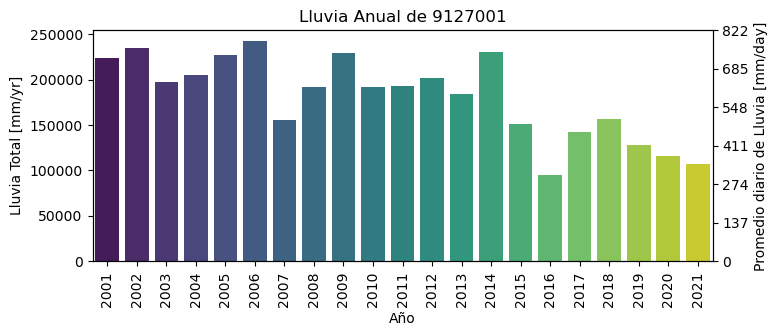

In [95]:
yy0, rr0 = yearly_rain(id0_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[0]))
plt.show()

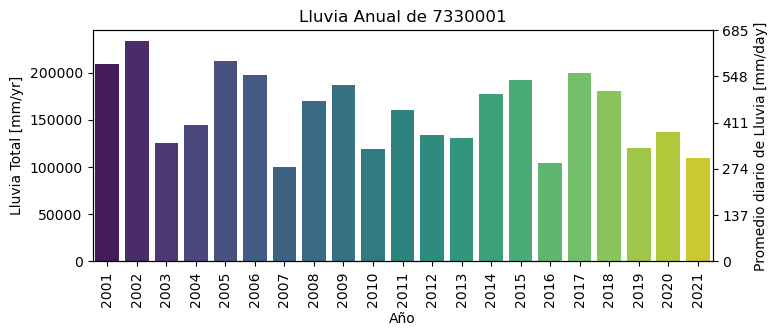

In [96]:
yy0, rr0 = yearly_rain(id1_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[1]))
plt.show()

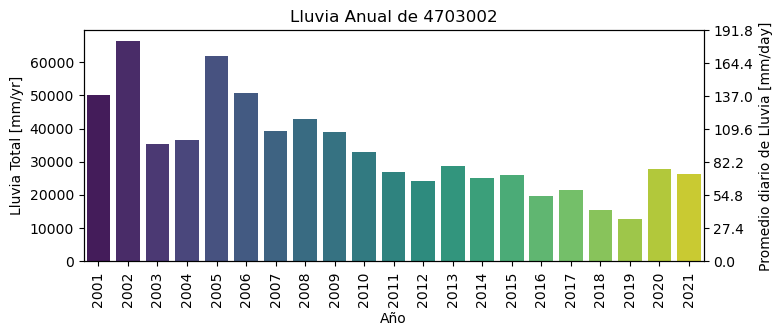

In [97]:
yy0, rr0 = yearly_rain(id2_dailyRain,2001,2021)
plot_lluvia_anual(yy0,rr0)
plt.title('Lluvia Anual de ' + str(cuencas[2]))
plt.show()

### Conseguir promedios diarios

In [100]:
            # groupby agrupa        #dt accede a info       # juntar el aggregate en mean 
daily_avg = data.groupby(data['date'].dt.dayofyear)['observed'].mean()
daily_avg

date
1       44.986111
2       17.200000
3       25.050000
4      101.904762
5      103.634921
          ...    
362     26.460317
363     64.071429
364     81.293651
365     50.174603
366     25.000000
Name: observed, Length: 366, dtype: float64

Verano: desde el 21 de diciembre (solsticio) al 20 de marzo (equinoccio).

Otoño: desde el 20 de marzo (equinoccio) al 21 de junio (solsticio).

Invierno: desde el 21 de junio (solsticio) al 21 de septiembre (equinoccio).

Primavera: desde el 21 de septiembre (equinoccio) al 21 de diciembre (solsticio).

In [162]:
# solo para visualizar ordenandolos en temporadas
# -1 al contar del 0
# +1 si es despues del 29 de febrero

def graficar_temporada(daily_avg):
    davg = list(daily_avg)

    mar20 = 79-1+1
    jun21 = 172-1+1
    sep21 = 264-1+1
    dic21 = 355-1+1
    verano = davg[dic21:] + davg[:mar20]
    otono = davg[mar20:jun21]
    invierno = davg[jun21:sep21]
    primavera = davg[sep21:dic21]

    print('largo del verano:', len(verano))
    print('largo del otoño:', len(otono))
    print('largo del invierno:', len(invierno))
    print('largo del primavera:', len(primavera))

    assert(len(verano) + len(otono) + len(invierno) + len(primavera) == len(daily_avg))

    # convertirlos a array para llenar un heatmap
    verano = np.array(verano + [np.nan for i in range(98-len(verano))])
    otono = np.array(otono + [np.nan for i in range(98-len(otono))])
    invierno = np.array(invierno + [np.nan for i in range(98-len(invierno))])
    primavera = np.array(primavera + [np.nan for i in range(98-len(primavera))])

    # Dividir la matriz en 4 secciones para representar las estaciones
    shapeh, shapev = -1, 7
    verano = verano.reshape((shapeh, shapev))
    primavera = primavera.reshape((shapeh, shapev))
    otono = otono.reshape((shapeh, shapev))
    invierno = invierno.reshape((shapeh, shapev))

    # Configurar el tamaño de la figura y los subgráficos
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Configurar los títulos de los subgráficos
    axs[0, 0].set_title('Primavera')
    axs[0, 1].set_title('Verano')
    axs[1, 0].set_title('Otoño')
    axs[1, 1].set_title('Invierno')

    # Crear los mapas de calor para cada estación
    sns.heatmap(primavera, cmap='YlGnBu', cbar=True, ax=axs[0, 0], linewidths=0.5)
    sns.heatmap(verano, cmap='YlGnBu', cbar=True, ax=axs[0, 1], linewidths=0.5)
    sns.heatmap(otono, cmap='YlGnBu', cbar=True, ax=axs[1, 0], linewidths=0.5)
    sns.heatmap(invierno, cmap='YlGnBu', cbar=True, ax=axs[1, 1], linewidths=0.5)

    # Ajustar los espacios entre subgráficos
    plt.tight_layout()

largo del verano: 90
largo del otoño: 93
largo del invierno: 92
largo del primavera: 91


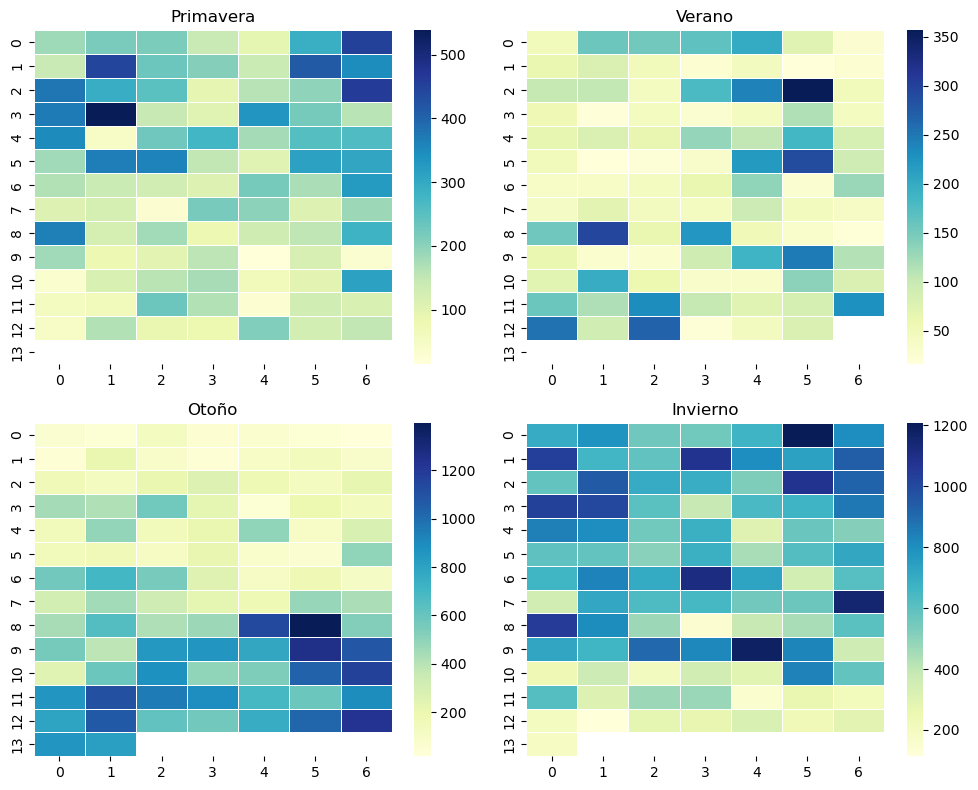

In [163]:
            # groupby agrupa        #dt accede a info       # juntar el aggregate en mean 
daily_avg = data.groupby(data['date'].dt.dayofyear)['observed'].mean()

graficar_temporada(daily_avg)
plt.show()

largo del verano: 90
largo del otoño: 93
largo del invierno: 92
largo del primavera: 91
Datos para 9127001


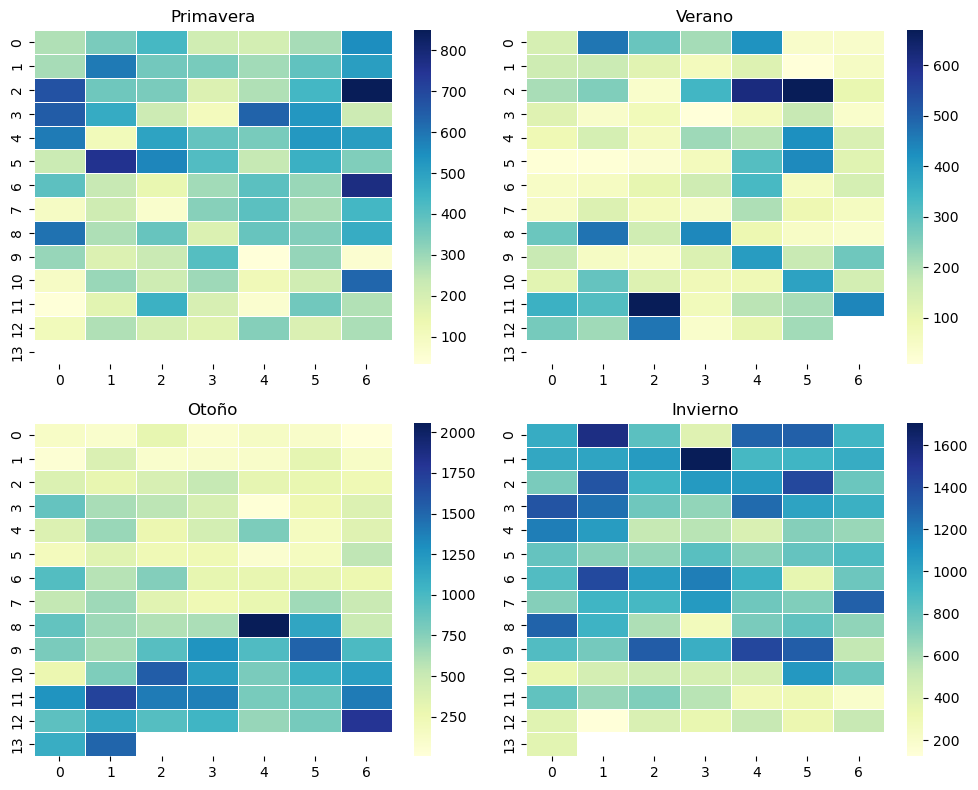

In [165]:
avg_id0 = id0_dailyRain.groupby(id0_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id0)
print('Datos para '+ str(cuencas[0]))
plt.show()


largo del verano: 90
largo del otoño: 93
largo del invierno: 92
largo del primavera: 91
Datos para 7330001


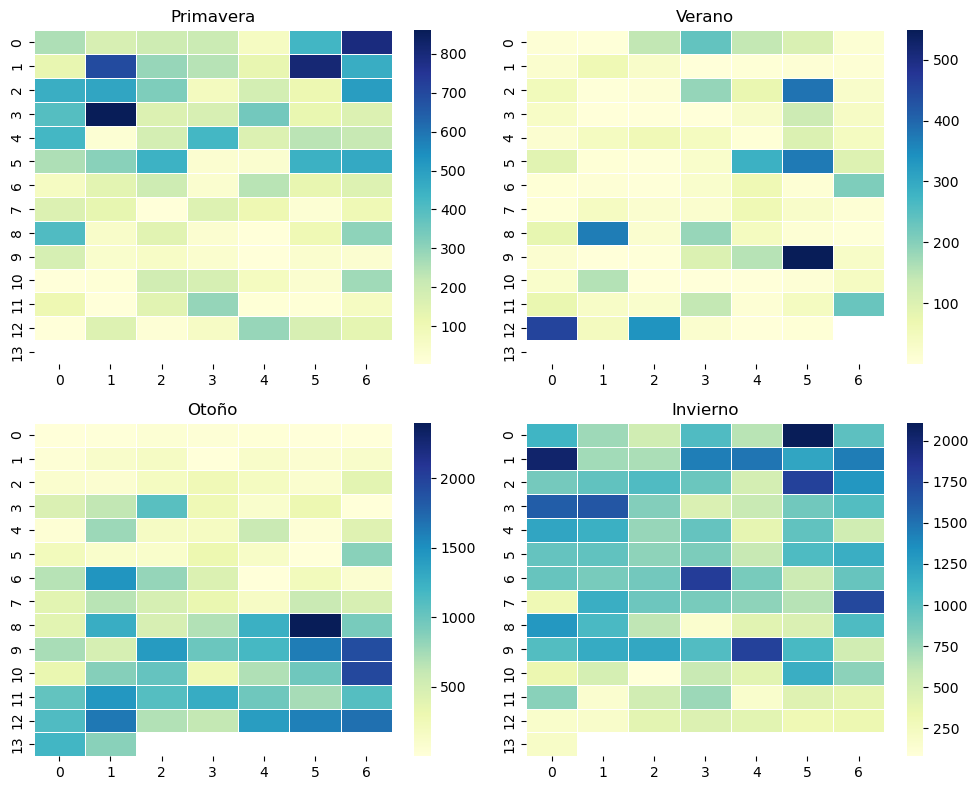

In [166]:
avg_id1 = id1_dailyRain.groupby(id1_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id1)
print('Datos para '+ str(cuencas[1]))
plt.show()

largo del verano: 90
largo del otoño: 93
largo del invierno: 92
largo del primavera: 91
Datos para 4703002


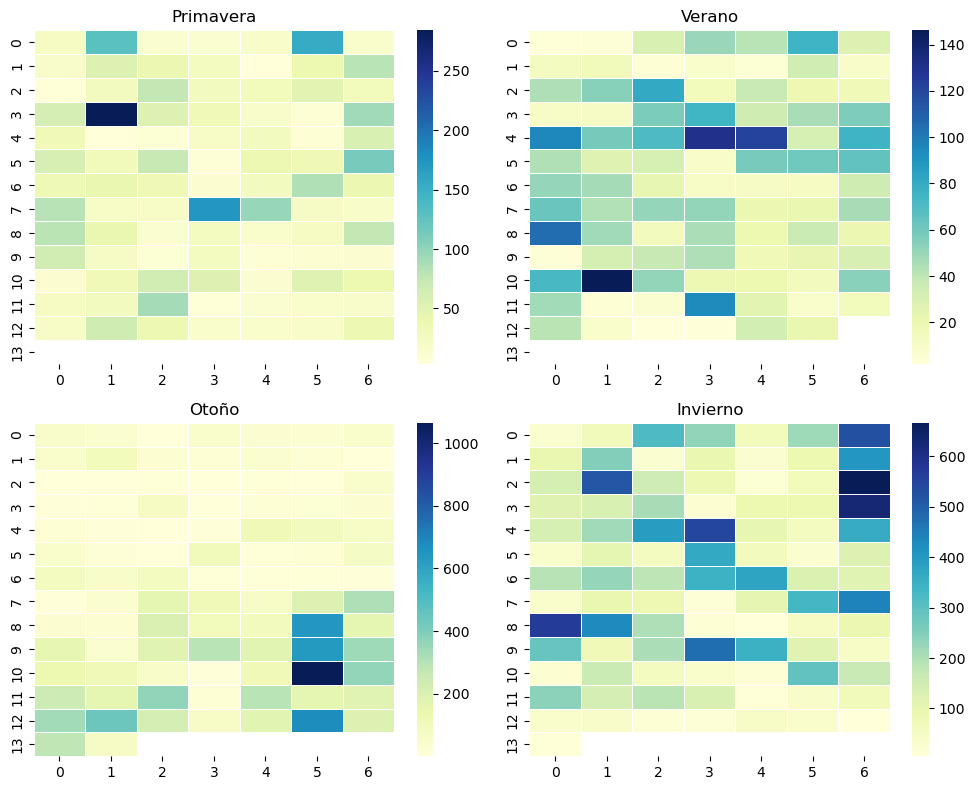

In [167]:
avg_id2 = id2_dailyRain.groupby(id2_dailyRain.index.dayofyear)['observed'].mean()

graficar_temporada(avg_id2)
print('Datos para '+ str(cuencas[2]))
plt.show()

### Creando el sistema de Persistencia y Climatologia

Previamente se creo un archivo llamado `memory.csv` el cual nos permitira acceder de manera estrategica a la informacion para poder utilizar el modelo

In [ ]:
# benchmark models
def persistence_model(input):
    

In [ ]:
def climatology_model

##Actividad 2: Random Forest
Construya un modelo de Random Forest para cada una de las cuencas incluidas en el dataset. Encuentre hiperparámetros y un conjunto de variables que permita superar el rendimiento de los modelos de benchmark. Si no logra un mejor modelo, discuta el porqué.

##Actividad 3: Redes Neuronales
Construya un modelo de redes neuronales para cada una de las cuencas del archivo de datos. Encuentre una estructura (justifíquela), conjunto de variables e hiperparámetros que superen los benchmarks. Si no consigue superarlos, discuta posibles razones.